In [1]:
import sys
sys.path.insert(0, "..")
import curvesim

In [2]:
pool_address = "0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7"  # 3Pool
pool = curvesim.pool.get(pool_address)

In [3]:
pool.coin_names

['DAI', 'USDC', 'USDT']

In [4]:
pool.coin_addresses

['0x6B175474E89094C44Da98b954EedeAC495271d0F',
 '0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48',
 '0xdAC17F958D2ee523a2206206994597C13D831ec7']

In [5]:
pool.coin_decimals

[18, 6, 6]

In [6]:
pool.balances

[150726805240173777552867109, 158272436496568, 79307996630068]

In [7]:
def format_balances(balances, decimals):
    return [f"{b//10**d:,}" for b,d in zip(balances, decimals)]

In [8]:
format_balances(pool.balances, pool.coin_decimals)

['150,726,805', '158,272,436', '79,307,996']

In [9]:
i = 1  # USDC
j = 2  # Tether
dx = 10**4 * 10**6

# with pool.use_snapshot_context():  # reverts balances after each exchange
dy, fee = pool.exchange(i, j, dx)
dy, fee

(9994337981, 999533)

In [10]:
pool.A

2000

In [11]:
pool.D() // 10**18  # pool value, assuming all coins mean-revert to $1

388297785

In [12]:
i = 0  # DAI
j = 1  # USDC
dx = 10**5 * 10**18

As = []
dys = []
for A in range(100, 10000, 100):
    pool.A = A
    with pool.use_snapshot_context():  # reverts balances after each exchange
        dy, fee = pool.exchange(i, j, dx)
    As.append(A)
    dys.append(dy // 10**6)

# reset to orig A
pool.A = pool.metadata["params"]["A"]

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
df = pd.DataFrame({"A": As, "dy": dys})
df = df.set_index('A')
df.head(), df.tail()

(         dy
 A          
 100  100035
 200  100013
 300  100005
 400  100001
 500   99999,
          dy
 A          
 9500  99990
 9600  99990
 9700  99990
 9800  99990
 9900  99990)

<AxesSubplot: xlabel='A'>

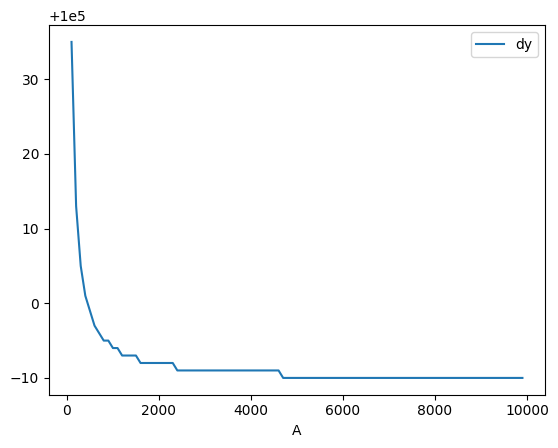

In [15]:
df.plot()

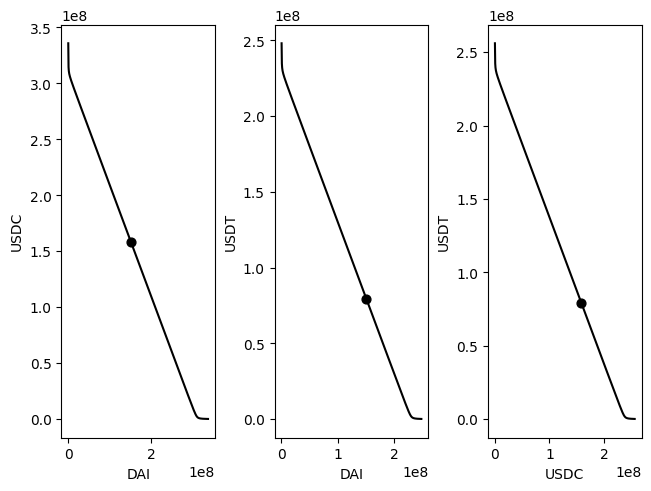

In [16]:
_ = curvesim.bonding_curve(pool)